# PART_A

#### DOMAIN: 

Digital content management

#### CONTEXT: 

Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

#### DATA DESCRIPTION: 

Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:

• 8240 "10s" blogs (ages 13-17),

• 8086 "20s" blogs(ages 23-27) and

• 2994 "30s" blogs (ages 33-47)

• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link.

#### PROJECT OBJECTIVE: 

To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case 
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable

In [1]:
# The neccesary libraries are imported here:

import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

#Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from glob import glob
import cv2
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Softmax,Flatten,Activation
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expression
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import nltk

import os

In [3]:
# Extract the ZIP file
file_path = "C:\\Users\\ASUS\\blogs.zip"

from zipfile import ZipFile
with ZipFile(file_path,'r') as zip:
  zip.extractall(path='C:\\Users\\ASUS\\blogs')

In [4]:
#Import the data set
df = pd.read_csv('C:\\Users\\ASUS\\blogs\\blogtext.csv')

### 1. Read and Analyse Dataset.

- A. Clearly write outcome of data analysis:

In [5]:
# see few rows of the imported dataset
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
# Check the number of rows and columns
df.shape

(681284, 7)

### Inspecting the dataset:

In [7]:
#Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [8]:
df.describe()

,id,age
count,6.812840e+05,681284.000000
mean,2.397802e+06,23.932326
std,1.247723e+06,7.786009
min,5.114000e+03,13.000000
25%,1.239610e+06,17.000000
50%,2.607577e+06,24.000000
75%,3.525660e+06,26.000000
max,4.337650e+06,48.000000


In [9]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [10]:
df.skew()

id    -0.239704
age    0.807838
dtype: float64

In [11]:
df.dtypes.value_counts()

object    5
int64     2
dtype: int64

#### The zip file dataset is extracted and stored in "df" variable.

1. The dataset has 681284 rows and 7 columns.

2. There are 7 columns of which 2 are of int and rest 5 are of object datatype.

3. The average age of the people is 24 years.

### 1. B. Clean the Structured Data 

 - i. Missing value analysis and imputation. 

 - ii. Eliminate Non-English textual data.


In [12]:
# Check for missing values present
print('Number of missing values across columns-\n', df.isnull().sum())

Number of missing values across columns-
 id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64


#### There are no missing values and we are dropping the Non-English textual features:

<AxesSubplot:xlabel='gender', ylabel='count'>

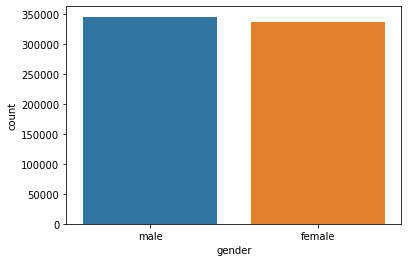

In [13]:
# Checking gendre distribution
sns.countplot(x='gender',data=df)

In [14]:
# Creation of data sub-set
data = df.head(5000)

In [15]:
# dropping non value added variables - id & date

## Eliminating the non-english Textual data:

data.drop(['id','date'], axis=1, inplace=True)

In [16]:
# looking at few rows post dropping non value added variables
data.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [17]:
data.shape

(5000, 5)

In [18]:
# converting "age"(non-English textual data) from int to object

data['age']=data['age'].astype('object')

In [19]:
# check to ensure all columns in object type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  5000 non-null   object
 1   age     5000 non-null   object
 2   topic   5000 non-null   object
 3   sign    5000 non-null   object
 4   text    5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


### 2. Preprocess unstructured data to make it consumable for model training. 

- A. Eliminate All special Characters and Numbers [2 Marks]

- B. Lowercase all textual data [1 Marks]

- C. Remove all Stopwords [1 Marks]

- D. Remove all extra white spaces [1 Marks]

In [20]:
# remove unwanted chars other than alphanumeric
data['clean_data']=data['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [21]:
# covert text to lower
data['clean_data']=data['clean_data'].apply(lambda x: x.lower())

In [22]:
# remove unwanted spaces
data['clean_data']=data['clean_data'].apply(lambda x: x.strip())

In [23]:
print("Actual data=======> {}".format(data['text'][1]))

Actual data=======>            These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          


#### C. Remove all stopwords: 

In [24]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
stopwords=set(stopwords.words('english'))

In [26]:
data['clean_data']=data['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [27]:
data['clean_data'][6]

'somehow coca cola way summing things well early flagship jingle like buy world coke tune like teach world sing pretty much summed post woodstock era well add much sales catchy tune korea coke theme urllink stop thinking feel pretty much sums lot korea koreans look relaxed couple stopped thinking started feeling course high regard education math logic deep think many koreans really like work emotion anything else westerners seem sublimate moreso least display different way maybe scratch westerners koreans probably pretty similar context different anyways think losing korea repeat stop thinking feel stop thinking feel stop thinking feel everything alright'

### Merging all other columns into label column

In [28]:
# merging cols. gender, age, topic and sign into lables col
data['labels']=data.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

In [29]:
# look at data set post merging cols
data.head()

,gender,age,topic,sign,text,clean_data,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [30]:
# retain data set with two pre-processed columns 
data = data[['clean_data','labels']]

In [31]:
data.head()

,clean_data,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


## 3. Build a base Classification model 

A. Create dependent and independent variables 


B. Split data into train and test.

C. Vectorize data using any one vectorizer.

D. Build a base model for Supervised Learning - Classification. 

E. Clearly print Performance Metrics.

## Splitting the data into X and Y

In [32]:
X=data['clean_data']

In [33]:
Y=data['labels']

#### Perform count vectorizer with bi-grams and tri-grams to get the count vectors of the X data

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vectorizer=CountVectorizer(binary=True, ngram_range=(1,2))

In [36]:
X=vectorizer.fit_transform(X)

In [37]:
X[1]

<1x329324 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud

In [39]:
# check feature names post vectorization

vectorizer.get_feature_names_out()[:6]

array(['aa', 'aa amazing', 'aa anger', 'aa compared', 'aa nice', 'aaa'],
      dtype=object)

In [40]:
label_counts=dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1

In [41]:
label_counts

{'male': 3294,
 '15': 339,
 'Student': 569,
 'Leo': 190,
 '33': 101,
 'InvestmentBanking': 70,
 'Aquarius': 329,
 'female': 1706,
 '14': 170,
 'indUnk': 1381,
 'Aries': 2483,
 '25': 268,
 'Capricorn': 84,
 '17': 331,
 'Gemini': 86,
 '23': 137,
 'Non-Profit': 47,
 'Cancer': 94,
 'Banking': 16,
 '37': 19,
 'Sagittarius': 704,
 '26': 96,
 '24': 353,
 'Scorpio': 408,
 '27': 86,
 'Education': 118,
 '45': 14,
 'Engineering': 119,
 'Libra': 414,
 'Science': 33,
 '34': 540,
 '41': 14,
 'Communications-Media': 61,
 'BusinessServices': 87,
 'Sports-Recreation': 75,
 'Virgo': 41,
 'Taurus': 100,
 'Arts': 31,
 'Pisces': 67,
 '44': 3,
 '16': 67,
 'Internet': 20,
 'Museums-Libraries': 2,
 'Accounting': 2,
 '39': 79,
 '35': 2307,
 'Technology': 2332,
 '36': 60,
 'Law': 3,
 '46': 7,
 'Consulting': 16,
 'Automotive': 14,
 '42': 9,
 'Religion': 4}

### Pre-processing the labels

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [43]:
Y=binarizer.fit_transform(data.labels)

### Splitting the data into 80% Train set :20% Test set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=2,test_size = 0.2)

In [46]:
print(Xtrain.shape)
print(Ytrain.shape)

(4000, 329324)
(4000, 54)


In [47]:
print(Xtest.shape)
print(Ytest.shape)

(1000, 329324)
(1000, 54)


In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

### Building Supervised Learning Classification model

1. Here,Logistic Regression model is fit on the training data.

2. Then,Xtest values are used to predict the outputs and stored in pred.

3. YPred and Ytest values are compared , its accuracy is found.

In [49]:
model=LogisticRegression(solver='lbfgs')

In [50]:
model=OneVsRestClassifier(model)

In [51]:
model.fit(Xtrain,Ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [52]:
Ypred = model.predict(Xtest)

### 3.E. Clearly print Performance Metrics.

### The performance metrics are :

1. Accuracy

2. Classification report - precision,recall,f1_score

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='micro'))

In [54]:
print_evaluation_scores_micro(Ytest, Ypred)

Accuracy score:  0.52
F1 score:  0.7418851878100639
Average precision score:  0.5860602927805056
Average recall score:  0.65425


In [55]:
def print_evaluation_scores_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='macro'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='macro'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='macro'))

In [56]:
print_evaluation_scores_macro(Ytest, Ypred)

Accuracy score:  0.52
F1 score:  0.22492698419819893
Average precision score:  0.18737172954015455
Average recall score:  0.18057623472448958


In [57]:
def print_evaluation_scores_weighted(Ytest, Ypred):
    print('Accuracy score of Base Model - SuperVised Learning: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='weighted'))

In [58]:
print_evaluation_scores_weighted(Ytest, Ypred)

Accuracy score of Base Model - SuperVised Learning:  0.52
F1 score:  0.6820843994052541
Average precision score:  0.6169459969144537
Average recall score:  0.65425


In [59]:
print('Classification Matrix:\n',classification_report(Ytest,Ypred))

Classification Matrix:
               precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       0.91      0.30      0.46        69
           2       0.00      0.00      0.00        19
           3       0.94      0.24      0.38        67
           4       0.00      0.00      0.00        29
           5       1.00      0.27      0.43        66
           6       0.80      0.10      0.18        39
           7       0.00      0.00      0.00        25
           8       0.00      0.00      0.00        21
           9       1.00      0.18      0.31        22
          10       0.99      0.76      0.86       117
          11       0.84      0.91      0.88       449
          12       1.00      0.09      0.17        11
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         1
   

#### The accuracy score of Base Model - SuperVised Learning with CountVectorizer is: 52%

#### From the classification report, the macro and micro average of precision ranges from 46% to 86%.

### 4. Improve Performance of model. 

- A. Experiment with other vectorisers. 

- B. Build classifier Models using other algorithms than base model.

- C. Tune Parameters/Hyperparameters of the model/s.

- D. Clearly print Performance Metrics. 

#### Again processing the dataset from the start to use other vectorizers:

In [60]:
# Extract the ZIP file
file_path = "C:\\Users\\ASUS\\blog.zip"

from zipfile import ZipFile
with ZipFile(file_path,'r') as zip:
  zip.extractall(path='C:\\Users\\ASUS\\blog')

In [61]:
#Import the data set
df1 = pd.read_csv('C:\\Users\\ASUS\\blog\\blogtext.csv')

In [62]:
df1.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [63]:
# Creation of data sub-set
data1 = df1.head(6000)

In [64]:
# dropping non value added variables - id & date

## Eliminating the non-english Textual data:

data1.drop(['id','date'], axis=1, inplace=True)

In [65]:
# looking at few rows post dropping non value added variables
data1.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [66]:
# converting "age"(non-English textual data) from int to object

data1['age'] = data1['age'].astype('object')

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  6000 non-null   object
 1   age     6000 non-null   object
 2   topic   6000 non-null   object
 3   sign    6000 non-null   object
 4   text    6000 non-null   object
dtypes: object(5)
memory usage: 234.5+ KB


In [68]:
# remove unwanted chars other than alphanumeric
data1['clean_data'] = data1['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [69]:
# covert text to lower
data1['clean_data'] = data1['clean_data'].apply(lambda x: x.lower())

In [70]:
# remove unwanted spaces
data1['clean_data'] = data1['clean_data'].apply(lambda x: x.strip())

In [71]:
print("Actual data=======> {}".format(data1['text'][1]))

Actual data=======>            These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          


In [72]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

import numpy as np
import nltk
# importing stopwords list
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [73]:
stopwords=set(stopwords.words('english'))

In [74]:
np.array(stopwords)

array({'who', 'couldn', 'hasn', 'needn', "didn't", 'than', 'their', 'more', 'as', 'themselves', "it's", 'hadn', 'you', "hasn't", 'doing', "mightn't", "mustn't", 'its', 'she', 'yourselves', 'when', 'wouldn', 'which', 'can', 'very', 'or', "weren't", 'them', 'own', 'itself', 'no', "haven't", 'mustn', 'what', 'that', 'it', 'such', 'too', 'so', 'are', 'm', 'we', 'now', 'against', 'himself', 'mightn', 'her', 'if', 'there', 'do', 'until', "wasn't", 'where', 'on', 'y', 'out', 'were', 'through', 'ain', "that'll", 'be', 'before', 'how', 'only', 'off', 'few', 'myself', 'my', 'hers', 'those', 'does', "should've", 's', 'herself', 'was', "she's", "doesn't", 'theirs', 'this', 'down', "needn't", 'during', 'him', 'below', 'having', 'some', 'with', 'while', 'into', 'ourselves', 'between', "shouldn't", 'they', 'because', 'other', 've', "couldn't", 'wasn', 'in', 'all', 'i', 'and', "hadn't", 'doesn', 'didn', 'should', 'been', 'shouldn', 'above', 'further', 'he', 'each', "won't", "you've", 'is', 'yours', 't

In [75]:
data1['clean_data'] = data1['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [76]:
# merging cols. gender, age, topic and sign into lables col
data1['labels'] = data1.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

In [77]:
# retain data set with two pre-processed columns 
data1 = data1[['clean_data','labels']]

In [78]:
data1.head(5)

,clean_data,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [79]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmafun(text):
  text = [lemmatizer.lemmatize(word)for word in text.split()]
  return " ".join(text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:
data1['clean_data'] = data1['clean_data'].apply(lemmafun)
data1.head(5)

,clean_data,labels
0,info found page mb pdf file wait untill team l...,"[male, 15, Student, Leo]"
1,team member drewes van der laag urllink mail r...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture url popups mean s...,"[male, 33, InvestmentBanking, Aquarius]"


In [81]:
# Check the colwidth 
#pd.options.display.max_colwidth
# resize
#pd.options.display.max_colwidth = 120

# Setting it to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [82]:
X1 = data1['clean_data']
y1 = data1['labels']

In [83]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20)

In [84]:
X_train1.shape

(4800,)

### Using the TfidfVectorizer:

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
tfidf = TfidfVectorizer(stop_words= 'english')
# tokenize and build vocab
tfidf.fit(X_train1)
# summarize
print(tfidf.vocabulary_)
print(tfidf.idf_)

{'new': 16538, 'favorite': 8891, 'bumpersticker': 3227, 'seen': 21713, 'bumper': 3226, 'shiny': 22057, 'volvo': 26705, 'groomed': 10633, 'woman': 27414, 'wheel': 27141, 'behaved': 2180, 'rarely': 19798, 'make': 14862, 'history': 11469, 'diva': 7001, 'important': 12166, 'infuriating': 12456, 'article': 1342, 'read': 19868, 'urllink': 26265, 'http': 11765, 'www': 27617, 'salon': 21247, 'com': 4678, 'news': 16553, 'wire': 27340, 'linguist': 14301, 'index': 12312, 'html': 11763, 'mwt': 16224, 'orphanage': 17308, 'gun': 10753, 'good': 10352, 'friend': 9678, 'john': 13205, 'robinson': 20896, 'asked': 1401, 'excellent': 8446, 'question': 19584, 'month': 15899, 'ago': 501, 'road': 20863, 'ohio': 17063, 'ben': 2234, 'voting': 26719, 'kerry': 13490, 'george': 10096, 'bush': 3287, 'replied': 20433, 'know': 13666, 'thank': 24717, 'changed': 3929, 'mind': 15599, 'night': 16613, 'volunteered': 26698, 'work': 27484, 'campaign': 3475, 'virginia': 26617, 'tonight': 25128, 'love': 14598, 'country': 5396

In [86]:
# encode document
X_train_tfidf = tfidf.transform(X_train1)
# summarize encoded vector
print(X_train_tfidf.shape)
#print(vector.toarray())

(4800, 27950)


In [87]:
print(y_train1.shape)

(4800,)


In [88]:
x3 = X_train_tfidf
x3

<4800x27950 sparse matrix of type '<class 'numpy.float64'>'
	with 229951 stored elements in Compressed Sparse Row format>

In [89]:
X_test_tfidf  = tfidf.transform(X_test1)
print(X_test_tfidf.shape)

(1200, 27950)


In [90]:
x4 = X_test_tfidf
x4

<1200x27950 sparse matrix of type '<class 'numpy.float64'>'
	with 53507 stored elements in Compressed Sparse Row format>

### 4.B. Build classifier Models using other algorithms than base model:

In [96]:
# Using the RandomForest Classifier and CountVectorizer


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, n_jobs=4)

clf.fit(Xtrain, Ytrain)
print('Accuracy of this Random Forest Classifier Model is',clf.score(Xtest, Ytest))

Accuracy of this Random Forest Classifier Model is 0.408


In [97]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [98]:
#Using KNN Model and CountVectorizer:

KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [99]:
KNN.fit(Xtrain,Ytrain)
pred_labels = KNN.predict(Xtest)

In [100]:
print('Accuracy on Training Data using KNN Classifier and CountVectorizer',KNN.score(Xtrain,Ytrain))
print('\n')
print('Accuracy on Testing Data using KNN Classifier and CountVectorizer',KNN.score(Xtest,Ytest))

Accuracy on Training Data using KNN Classifier and CountVectorizer 0.433


Accuracy on Testing Data using KNN Classifier and CountVectorizer 0.373


In [101]:
print('Classification Matrix:\n',classification_report(Ytest,pred_labels))

Classification Matrix:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        69
           2       0.00      0.00      0.00        19
           3       0.06      0.03      0.04        67
           4       0.00      0.00      0.00        29
           5       1.00      0.06      0.11        66
           6       0.00      0.00      0.00        39
           7       0.00      0.00      0.00        25
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        22
          10       1.00      0.03      0.05       117
          11       0.46      0.82      0.59       449
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         1
   

### C. Tune Parameters/Hyperparameters of the model/s

In [102]:
myList = list(range(1,51))
# This 1 to 51 tells the no of neighbours for each query
n_neighbors = list(filter(lambda x:x % 2 != 0,myList))

In [104]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, Ytrain)
    # predict the response
    y_pred = knn.predict(Xtest)
    # evaluate accuracy
    scores = accuracy_score(Ytest, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = n_neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


In [105]:
#Using KNN Model and CountVectorizer:

KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')

KNN.fit(Xtrain,Ytrain)
pred_labels = KNN.predict(Xtest)

In order to tune the parameters, Optimal value of No. of Neighbors for a KNN Model is found and its said to be 3.

### 4.D. Clearly print Performance Metrics:

The performance metrics are :

1. Accuracy

2. Classification report - precision,recall,f1_score

In [106]:
print('Accuracy on Training Data using KNN Classifier and CountVectorizer',KNN.score(Xtrain,Ytrain))
print('\n')
print('Accuracy on Testing Data using KNN Classifier and CountVectorizer',KNN.score(Xtest,Ytest))

Accuracy on Training Data using KNN Classifier and CountVectorizer 0.479


Accuracy on Testing Data using KNN Classifier and CountVectorizer 0.451


## Accuracy on Data using KNN Classifier and CountVectorizer is improved from 37 to 45%.

In [107]:
print('Classification Matrix:\n',classification_report(Ytest,pred_labels))

Classification Matrix:
               precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       0.00      0.00      0.00        69
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        67
           4       0.00      0.00      0.00        29
           5       1.00      0.06      0.11        66
           6       0.00      0.00      0.00        39
           7       0.00      0.00      0.00        25
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        22
          10       1.00      0.03      0.05       117
          11       0.47      1.00      0.64       449
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         1
   

### But the Logistic Regression model with CountVectorizer has an Accuracy of 52%.(Final Model)

### 5. Share insights on relative performance comparison 


##### - 5.A. Which vectorizer performed better? Probable reason?

1. Count Vectorizer makes the text data to be used directly in machine learning and deep learning models such as text classification.Each input is preprocessed, tokenized, and represented as a sparse matrix. CountVectorizer is used to transform a corpora of text to a vector of term / token counts. 

2. It also provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text.

So CountVectorizer model has performed better.

##### - 5.B. Which model outperformed? Probable reason? 

1. Among the RandomForest Classifier, Logistic Regression and KNN Model,

2. Logistic Regression model has performed well with Count Vectorizer and has an accuracy of 52%.

#### - 5.C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?. 

1. I tried to improve performance of KNN Model by finding the optimal n_neighbours and its found to be 3.

2. Now the accuracy of KNN Model has improved from 37% to 45%.

Hence n_neighbours parameter significantly helped to improve performance of the Model.

#### - 5.D. According to you, which performance metric should be given most importance, why?. 
.
1. Precision is the most important performace metric that is needed to be considered.

2.  Precision is how good the model is at predicting a specific category, So for me its the most important performance metric to be considered for evaluating the performance. 

3. Based on precision of a model, we can decide to tune the parameters so as to get the best predicting model.

# NLP_PROJECT1_PART         -         THE END